In [1]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
sns.set_style('white')

In [2]:
### warmup exercise #####

def warmUpExercise():
    return(np.identity(5))               #create a 5 by 5 identity matrix

warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

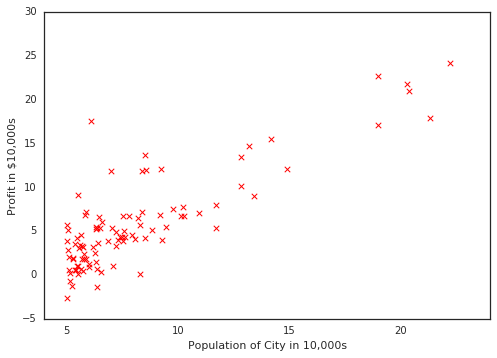

In [3]:
###############################################################
###### linear regression one variable #########################
###############################################################

## take a look at the data

data = np.loadtxt('data/ex1data1.txt',delimiter=',')     # load data    
X = np.matrix([np.ones(data.shape[0]),data[:,0]]).T      # add a column of 1s to X 
y = np.matrix(data[:,1]).T                               # get the last column as y, and make it into a vector
plt.scatter(X[:,1],y,s=30,c='r',marker='x',linewidths=1) # plot x agains y 
plt.xlim(4,24)                                           # give x axis range
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')    

In [4]:
####### Cost function ##################
def computeCost(X,y,theta=[[0],[0]]):    #if theta is not passed, set it to be [0,0]
    m = y.size
    J = (X*theta - y).T*(X*theta - y)/(2*m)
    return J.item(0)                          #return the value of the scaler

computeCost(X,y)

32.072733877455676

theta: [[-3.63029144  1.16636235]]


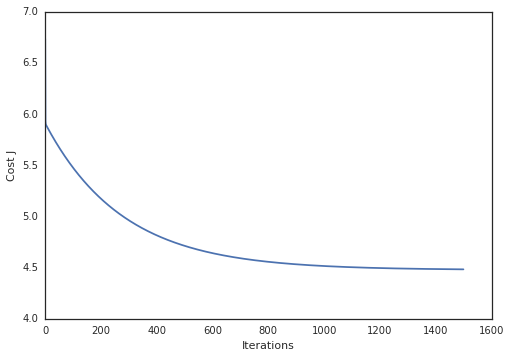

In [5]:
####### Gradient Descent ##################
def gradientDescent(X,y,theta=[[0],[0]],alpha=0.01,num_iters=1500):
    #alpha=0.01
    theta=np.matrix(theta)
    #num_iters = 1500
    m=y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        theta = theta - (alpha/m)*X.T*(X*theta-y)
        J_history[iter] = computeCost(X,y,theta)

    return(theta,J_history)

theta,Cost_J = gradientDescent(X,y)
print('theta: %s' %theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

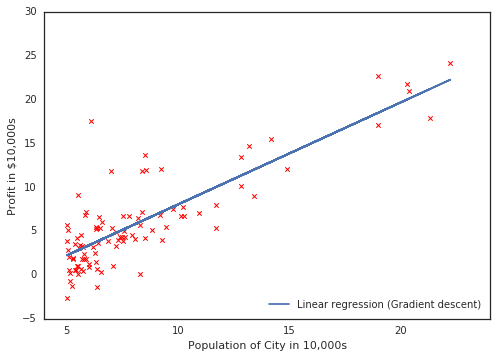

In [6]:
############# predictions ###############

y_hat = X*theta                                       # use matrix muplitaction to calculate y hat
y_hat
plt.scatter(X[:,1],y,c='r',marker='x',linewidths=1)   # plot both scatter and line chart 
plt.plot(X[:,1],y_hat,label='Linear regression (Gradient descent)')
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)

## linear regression with Scikit-learn

In [35]:
regr = LinearRegression()
X = np.array(X)
regr.fit(X[:,1].reshape(1,-1),y.ravel())

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])